# Logistic Regression

Olatomiwa Bifarin. <br>
PhD Candidate Biochemistry and Molecular Biology <br>
@ The University of Georgia

_This is a draft copy, a work in progress_

## Notebook Outline
1. [Introduction](#1)
2. [Logistic Regression](#2)
3. [Loss and Cost Function](#3)
4. [Implementation](#4)

In [230]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import cm
#For Seaborn plots
import seaborn as sns; sns.set(style='white')

# More sharp and legible graphics
%config InlineBackend.figure_format = 'retina'

# for datasets
import sklearn.datasets as skds

# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=0.8)

## 1. Introduction
<a id="1"></a>

$$ \Large \mbox{Given the dataset } X: [x_{1}, x_{2}, ... x_{m}]$$

Where $x \in \mathbb{R}^{m}$ with the following parameters: 

$$ \Large w \in \mathbb{R}^{m} \mbox{, } \Large b \in \mathbb{R}$$

Where $m$ is the number of samples, $w$ is the weight parameter, and $b$ is the bias parameter. For a simple linear regression function, we have the following: $$ \Large \hat y = w^{T}x + b$$

And this will work by definition for a regression problem but not for a classification problem.  To achieve the aim of the latter, we will need a different function where we could get something like the probability of a class membership. i.e. $f: \mathbb{R} \rightarrow [0,1]$. If the probability is greater than 0.5, we predict a class, if it is less than 0.5, we predict another class. This is what `logistic regression` gives us. 

That is: 
$$ \hat y = 
\begin{cases}
0 & \text{ if } p < 0.5 \\
1 & \text{ if } p \geq 0.5 
\end{cases}$$

## 2. Logistic Regression
<a id="2"></a>

To make the logistic regression outputs a probability instead of a _normal_ regression output, the output is multiplied by a sigmoid function, which is defined as such: $$ \Large \sigma(z) = \frac{1}{1 + \exp^{-z}}$$

What a sigmoid function looks like: 

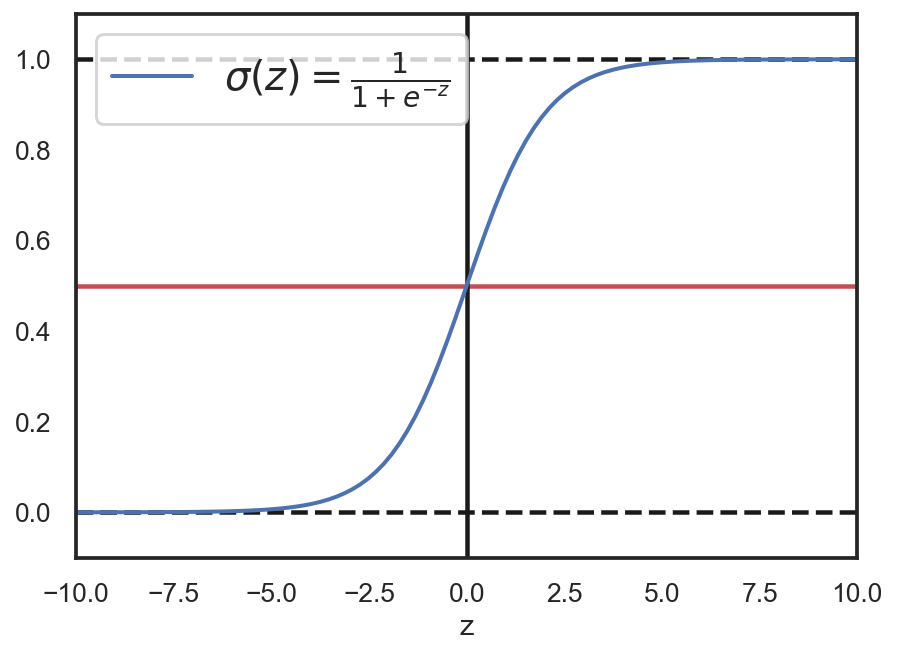

In [231]:
z = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-z))
plt.figure(figsize=(7, 5))
plt.plot([-10, 10], [0, 0], "k--")
plt.plot([-10, 10], [0.5, 0.5], "r-")
plt.plot([-10, 10], [1, 1], "k--")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(z, sig, "b-", linewidth=2, label=r"$\sigma(z) = \frac{1}{1 + e^{-z}}$")
plt.xlabel("z")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

$$ \Large \mbox{if Z is large i.e. = 10, } \sigma(z) = 1 $$

$$ \Large \mbox{if Z is small i.e. = -10, } \sigma(z) = 0 $$

## 3. Loss and Cost Function
<a id="3"></a>

In order to train the model, $w$ and $b$ will be updated, as such we need to define our loss/cost function.  

Recall that: 
$$ \Large \hat y = \sigma(w^{T}x + b) \mbox{ where, }\sigma(z) = \frac{1}{1 + \exp^{-z}} $$
Given the following training set: $[x^{1}, y^{1}], [x^{2}, y^{2}],  ... [x^{m}, y^{m}]$, the goal is to predict $y$. 

Loss function for logistic regression: 
$$\Large l(\hat y, y) = -(y\log \hat y + (1-y) \log (1- \hat y))$$

Hence, cost function is defined as such (also called the log loss): 
$$ \Large C (w,b) = -\frac{1}{m}\sum_{i=1}^{m} [y^{(i)}\log \hat y^{(i)} + (1-y^{(i)}) \log (1- \hat y^{(i)})]$$ 

The goal is to search for the values of $w$ and $b$ that will minimize $C$. This will be achieved by taking the derivatives of $C$ with respect to the parameters. 

$\Large C(w,b)$. The update will go as follows: 

$$ \Large  w := w - \alpha \frac {\partial C}{\partial w} $$

$$ \Large  b := b - \alpha \frac {\partial C}{\partial b} $$

where $\alpha $ is the learning rate.  

## 4. Implementation
<a id="4"></a>

### A perfect linearly separable dataset

Let's make up a toy dataset with two features (the axis) and 2 categories (color coded).

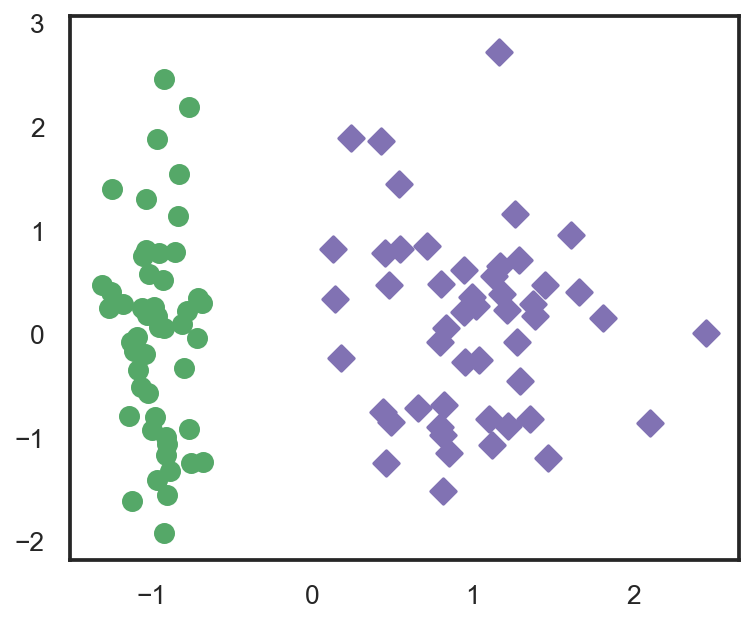

In [233]:
X, y = skds.make_classification (n_features = 2,
                                 n_redundant=0,
                                 n_informative=1,
                                n_clusters_per_class = 1,
                                random_state = 42) #5216
ax1 = [i for i, x in enumerate(y) if x == 0]
ax2 = [i for i, x in enumerate(y) if x == 1]
fig = plt.figure(figsize=(6,5))
plt.scatter(X[ax1, 0], X[ax1, 1], marker='o',color='g')
plt.scatter(X[ax2, 0], X[ax2, 1], marker='D',color='m')
#plt.xlabel("Feature-1",fontsize=15)
#plt.ylabel("Feature-2",fontsize=15)
plt.show()

Fit a logistic regression with the data.

In [234]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of the classification

In [235]:
print("The accuracy of the classification: {0:.0%}".format(log_reg.score(X, y)))

The accuracy of the classification: 100%


#### Decision Boundary

In [236]:
print("Bias: {0:.2}".format(log_reg.intercept_[0]))
print("Weight parameter for class 0: {0:.2}".format(log_reg.coef_[0][0]))
print("Weight parameter for class 0: {0:.2}".format(log_reg.coef_[0][1]))

Bias: 0.3
Weight parameter for class 0: 3.5
Weight parameter for class 0: 0.16


Recall:
$$ \Large \hat y = \sigma(w^{T}x + b) \mbox{ where, }\sigma(z) = \frac{1}{1 + \exp^{-z}} $$

The sigmoid function

In [237]:
def sigmoid(x1, x2, b, w0, w1):
    return 1.0/(1+np.exp(-b - x1*w0 - x2*w1))

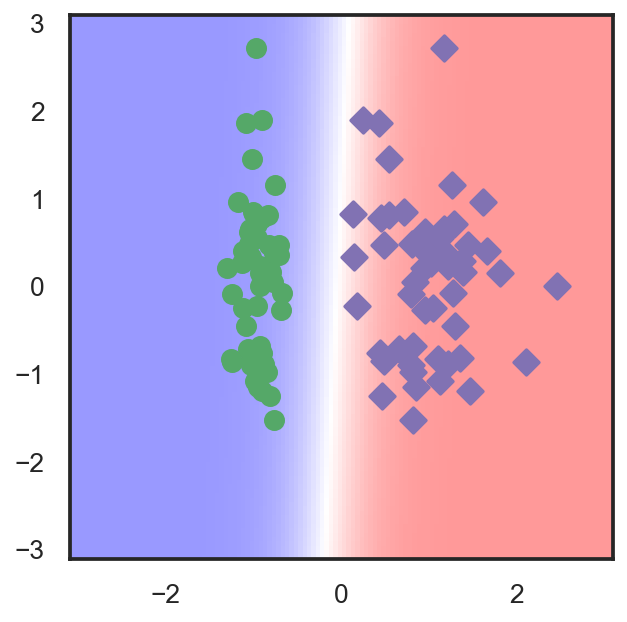

In [238]:
x1 = np.arange(-3.1, 3.1, 0.05)
x2 = np.arange(-3.1, 3.1, 0.05)
x1,x2 = np.meshgrid(x1, x2)
y_pred = sigmoid(x1, x2, log_reg.intercept_[0],
                 log_reg.coef_[0][0],
                 log_reg.coef_[0][1])
extent = -3.1, 3.1, -3.1, 3.1
fig = plt.figure(figsize=(6,5))
plt.imshow(y_pred, cmap=cm.bwr, alpha=.4, extent = extent);
plt.scatter(X[ax1, 0], X[ax2, 1], marker='o',color='g')
plt.scatter(X[ax2, 0], X[ax2, 1], marker='D',color='m')
plt.show()

### A less linearly separable dataset.

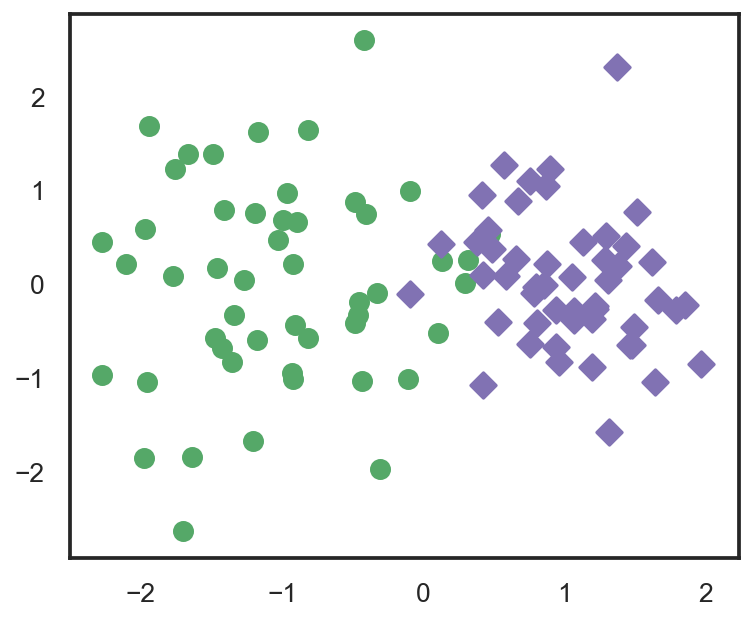

In [239]:
X, y = skds.make_classification (n_features = 2,
                                 n_redundant=0,
                                 n_informative=1,
                                n_clusters_per_class = 1,
                                random_state = 354) #354
ax1 = [i for i, x in enumerate(y) if x == 0]
ax2 = [i for i, x in enumerate(y) if x == 1]
fig = plt.figure(figsize=(6,5))
plt.scatter(X[ax1, 0], X[ax1, 1], marker='o',color='g')
plt.scatter(X[ax2, 0], X[ax2, 1], marker='D',color='m')
plt.show()

In [240]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of the classification

In [241]:
print("The accuracy of the classification: {0:.1%}".format(log_reg.score(X, y)))

The accuracy of the classification: 95.0%


#### Decision Boundary

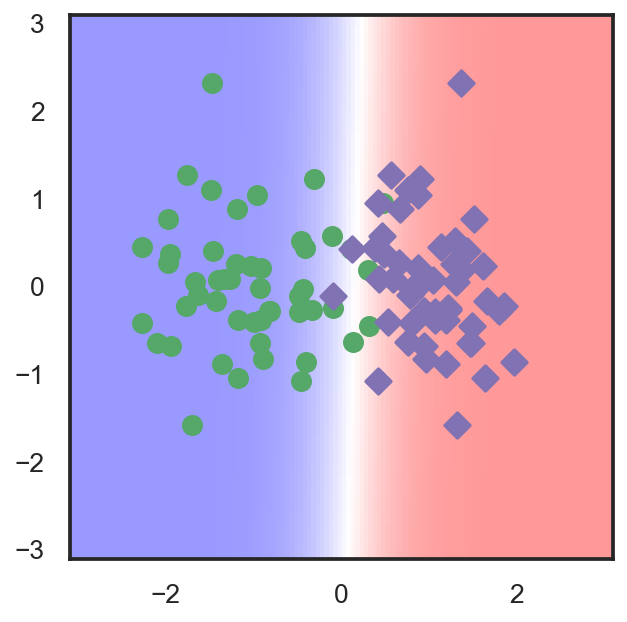

In [242]:
def sigmoid(x1, x2, b, w0, w1):
    return 1.0/(1+np.exp(-b - x1*w0 - x2*w1))

x1 = np.arange(-3.1, 3.1, 0.05)
x2 = np.arange(-3.1, 3.1, 0.05)
x1,x2 = np.meshgrid(x1, x2)
y_pred = sigmoid(x1, x2, log_reg.intercept_[0],
                 log_reg.coef_[0][0],
                 log_reg.coef_[0][1])
extent = -3.1, 3.1, -3.1, 3.1

fig = plt.figure(figsize=(6,5))
plt.imshow(y_pred, cmap=cm.bwr, alpha=.4, extent = extent);
plt.scatter(X[ax1, 0], X[ax2, 1], marker='o',color='g')
plt.scatter(X[ax2, 0], X[ax2, 1], marker='D',color='m')
plt.show()